# Pymaceuticals Inc.
---

### Analysis

When looking at the data Capomulin and Ramicane have the highest number of observed mouse timepoints. Additionally, there were more males tested in tahn females. 
When considering Capomulin treatment of mouse with ID l509, tumor volume increases steadily that rapidly decreases around day 20. 
Looking at the linear regression for mouse weight vs. the average observed tumor volume for the entire Capomulin regimen, there is a poitive correlation (84%) comparing weight to average tumor volume. This means that mice on Capomulin that are heavier are more likely to have larger tumors. 
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice.
number_mice = combined_df['Mouse ID'].nunique()
number_mice

249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_df['Mouse ID'] != 'g989'

In [27]:
new_df = combined_df[combined_df['Mouse ID'] != 'g989']
new_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice in the clean DataFrame.
new_number_mice = new_df['Mouse ID'].nunique()
new_number_mice

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume': mean,
                           'Median Tumor Volume': median,
                           'Tumor Volume Variance': var,
                           'Tumor Volume Std. Dev.': std,
                           'Tumor Volume Std. Err.': sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_summary_df = new_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
new_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

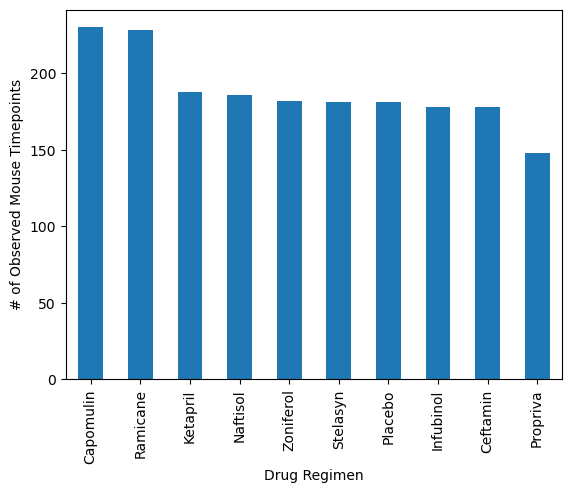

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = new_df['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

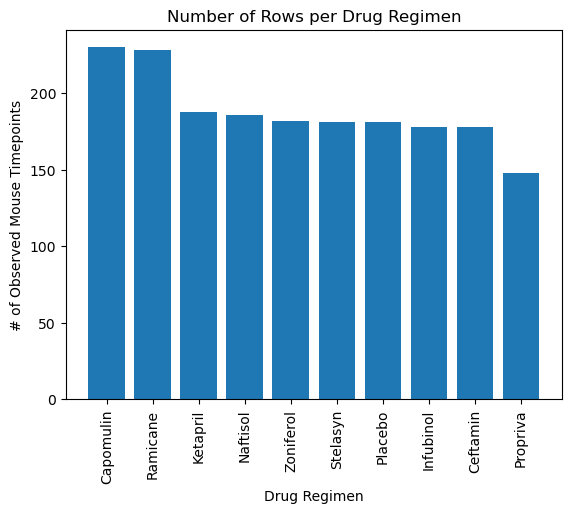

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = new_df['Drug Regimen'].value_counts()

# Create a bar plot
plt.bar(regimen_counts.index, regimen_counts.values)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Rows per Drug Regimen')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

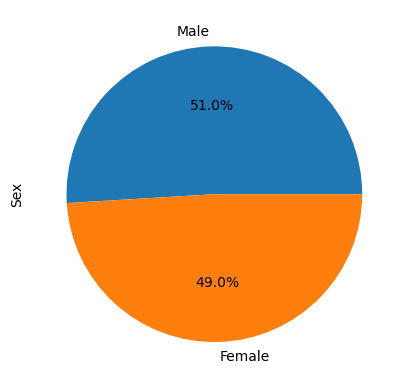

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = new_df['Sex'].value_counts()
sex_data.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.ylabel('Sex')
plt.show()

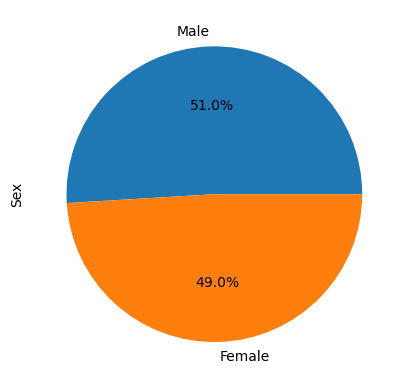

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = new_df['Sex'].value_counts()
plt.pie(sex_data, labels=sex_data.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = new_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(new_df, greatest_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Final tumor volume of each mouse for the specific treatments
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_rows = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    # Get the tumor volumes for the current treatment
    tumor_volumes = treatment_rows['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Check for potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the treatment and the potential outliers, if any
    print(f"{treatment}'s potential outliers: {outliers}")
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


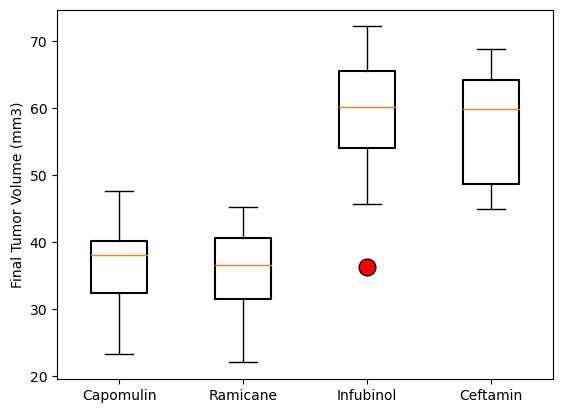

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxprops = dict(color='black', linewidth=1.5)
flierprops = dict(marker='o', markersize=12, markerfacecolor='red')
plt.boxplot([merged_df[merged_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] for treatment in treatments], boxprops=boxprops, flierprops=flierprops)
plt.xticks(range(1, len(treatments) + 1), treatments)
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

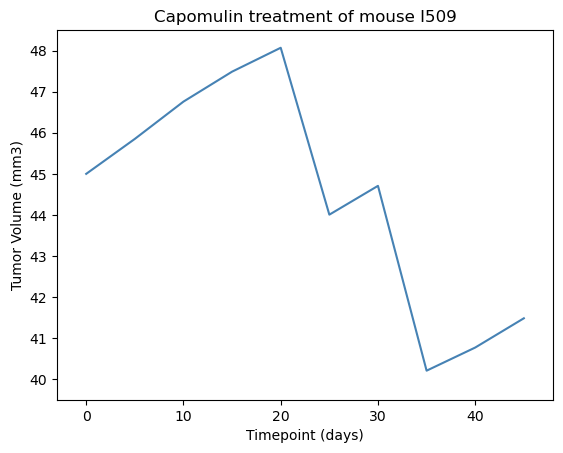

In [55]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509' 
capomulin_data = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin') & (combined_df['Mouse ID'] == mouse_id)]


plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-', color='steelblue')
plt.xlim(-3, 48)
plt.xticks([0, 10, 20, 30, 40])
plt.ylim(39.5, 48.5)
plt.yticks(range(40, 49))

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")

plt.show()

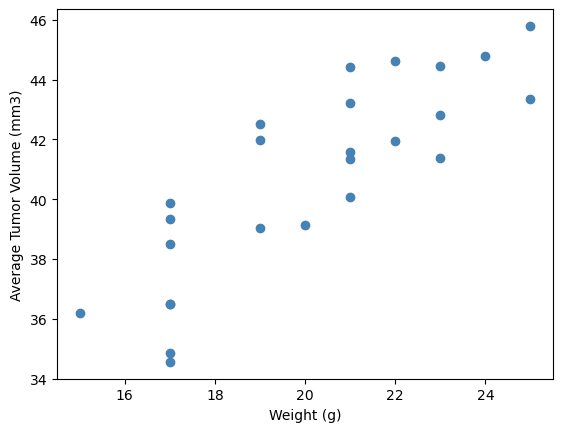

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_df[combined_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].unique().str[0]

plt.scatter(mouse_weight, average_tumor_volume, color='steelblue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


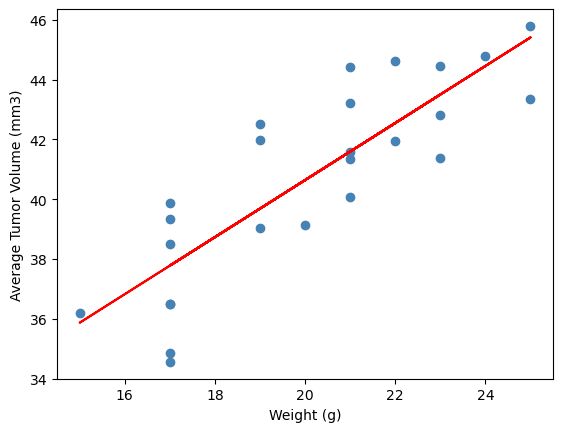

In [58]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(mouse_weight, average_tumor_volume)[0]

# Linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)
regression_line = slope * mouse_weight + intercept

plt.scatter(mouse_weight, average_tumor_volume, color='steelblue')
plt.plot(mouse_weight, regression_line, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
plt.show()